<a href="https://colab.research.google.com/github/OscarRondoni/eliminar_por_favor/blob/main/REGRESION_LINIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[numpy](https://numpy.org/doc/) | [pandas](https://pandas.pydata.org/docs/user_guide/index.html) | [scipy](https://docs.scipy.org/doc/scipy/) | 
[matplolib](https://matplotlib.org/) | [seaborn](seaborn) | [scilearn](https://scikit-learn.org/stable/) | [statsmodels](https://www.statsmodels.org/stable/index.html) |[MINIMOS CUADRADOS](http://ocw.uc3m.es/matematicas/algebra-lineal/teoria/algebra_teoria_13.pdf) | [Intervalo confianza](https://es.wikipedia.org/wiki/Intervalo_de_confianza) | [momentos centrados](https://es.wikipedia.org/wiki/Momento_central) | [interpretacion](https://es.acervolima.com/interpretacion-de-los-resultados-de-la-regresion-lineal-mediante-el-resumen-de-ols/) | [analisis exhaustivo_R](http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/GuiaSPSS/18reglin.pdf) | [AIC](https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_de_Akaike#:~:text=El%20criterio%20de%20informaci%C3%B3n%20de,un%20conjunto%20dado%20de%20datos.&text=AIC%20no%20proporciona%20una%20prueba,modelo%20en%20un%20sentido%20absoluto.) | [BIC](https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_bayesiano)

INPUT: EQUIPOS,BATEOS,RUNS (BASEBALL)
OUTPUT: Se desea estudiar la relación entre BATEOS y RUNS

## CONFIGURACION


In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## DATOS

In [ ]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


Representación gráfica
El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.


## GRAFICO

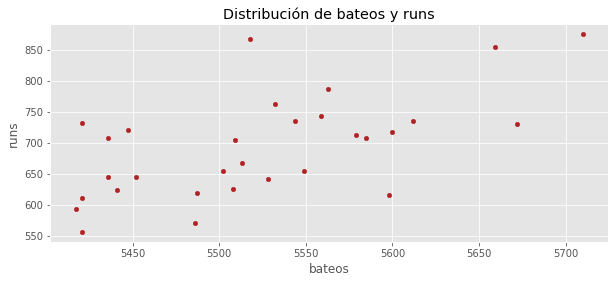

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 4))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');


# CORRELACION LINEAL SIMPLE (SCIPY)

In [ ]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206688
P-value:  0.0003388351359791963


[correlacion PEARSON](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson) |
[p-valor](https://es.wikipedia.org/wiki/Valor_p#Ejemplo_con_monedas) | [Contraste hipotesis](https://es.wikipedia.org/wiki/Contraste_de_hip%C3%B3tesis)

El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.
Ajuste del modelo

Se ajusta un modelo empleando como variable respuesta runs y como predictor bateos. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.



In [ ]:
# Scikit-learn
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']] # pandas.core.series.Series
y = datos['runs'] # pandas.core.frame.DataFrame

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1), # X.values es array
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)
LinearRegression()

# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


runs = -2368 + 0.55 bateos



Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.


In [ ]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(              #sklearn.metrics
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

El error (rmse) de test es: 59.336716083360486


[rmse (raiz del error cuadratico medio)](https://es.wikipedia.org/wiki/Ra%C3%ADz_del_error_cuadr%C3%A1tico_medio)

## REGRESION LINIAL SIMPLE (STATSMODELS)

Statsmodels
La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

FORMA 1 (SIMILAR A R)
Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

FORMA 2 (MATRICIAL)
Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.


In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

In [ ]:
# FORMA 1
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
#datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
#modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
#modelo = modelo.fit()
#print(modelo.summary())

In [ ]:
# FORMA 2
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Wed, 09 Feb 2022   Prob (F-statistic):            0.00906
Time:                        09:25:29   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

Interpretación


*   La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal ( β^0  y  β^1 ) que equivalen a la ordenada en el origen (intercept o const) y a la pendiente.

*   Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).




*   El valor de R-squared indica que el modelo es capaz de explicar el 27.1% de la variabilidad observada en la variable respuesta (runs). Además, el p-value obtenido en el test F (Prob (F-statistic) = 0.00906) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).
*   El modelo lineal generado sigue la ecuación: runs = -2368 + 0.55 bateos
 

*   Por cada unidad que se incrementa el número de bateos, el número de runs aumenta en promedio 0.6305 unidades.
*   El error de test del modelo es de 59.34. Las predicciones del modelo final se alejan en promedio 59.34 unidades del valor real.












[Factor de Inflación de Varianza (VIF)](https://www.analyticslane.com/2020/04/22/solucionar-la-multicolinealidad-con-vif/) 

Intervalos de confianza de los coeficientes

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

Predicciones


Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

.predict(): devuelve únicamente el valor de las predicciones.

.get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.


In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


Representación gráfica del modelo


Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.


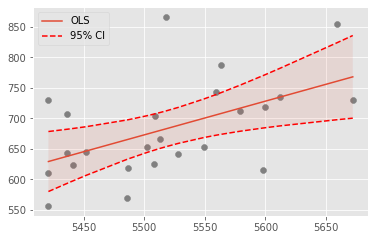

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

## Error de test


In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 59.33671608336157
